## WATER QUALITY:STATISTICAL ANALYSIS-pH value prediction

## Table of content

**1:data collection**

**2:data description**

**3:data preprocessing**

**4:exploratory data analysis**

**5:outlier detection and handling**

**6:data visualisation**

**7:feature selection**

**8:feature scaling**

**9:encoding**

**10:split dataset**

**11:modelling**

**12:conclusion**

**goal**

to predict quality of water based on pH of water

In [130]:
#load required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

**import dataset**

In [132]:
url = "C:\\Users\\afla1\\Downloads\\archive (7)\\brisbane_water_quality.csv"
df = pd.read_csv(url)
df

Timestamp  Record number  Average Water Speed  \
0      2023-08-04 23:00:00           1468                4.834   
1      2023-08-04 23:30:00           1469                2.544   
2      2023-08-04 23:00:00           1470                1.260   
3      2023-08-04 23:30:00           1471                0.760   
4      2023-08-04 23:00:00           1472                3.397   
...                    ...            ...                  ...   
30889  2024-06-27 08:20:00          32357               13.314   
30890  2024-06-27 08:30:00          32358               32.617   
30891  2024-06-27 08:40:00          32359                8.552   
30892  2024-06-27 08:50:00          32360               10.341   
30893  2024-06-27 09:00:00          32361               11.173   

       Average Water Direction  Chlorophyll  Chlorophyll [quality]  \
0                       73.484        1.621                    NaN   
1                      106.424        1.959                    NaN   
2                      156.755        1.620                    NaN   
3                      281.754        1.761                    NaN   
4                      244.637        1.635                    NaN   
...                        ...          ...                    ...   
30889                   82.720        0.944                 1020.0   
30890                   18.081        1.161                 1020.0   
30891                  306.184        1.192                 1020.0   
30892                   24.711        1.031                 1020.0   
30893                  241.662        0.946                 1020.0   

       Temperature  Temperature [quality]  Dissolved Oxygen  \
0           20.018                    NaN             7.472   
1           19.986                    NaN             7.455   
2           20.001                    NaN             7.430   
3           19.983                    NaN             7.419   
4           19.986                    NaN             7.429   
...            ...                    ...               ...   
30889       18.607                 1020.0             6.876   
30890       18.551                 1020.0             6.918   
30891       18.558                 1020.0             6.651   
30892       18.547                 1020.0             6.740   
30893       18.562                 1020.0             5.842   

       Dissolved Oxygen [quality]  Dissolved Oxygen (%Saturation)  \
0                             NaN                         101.175   
1                             NaN                         100.884   
2                             NaN                         100.571   
3                             NaN                         100.398   
4                             NaN                         100.538   
...                           ...                             ...   
30889                      1020.0                          87.556   
30890                      1020.0                          87.987   
30891                      1020.0                          84.606   
30892                      1020.0                          85.713   
30893                      1020.0                          74.326   

       Dissolved Oxygen (%Saturation) [quality]     pH  pH [quality]  \
0                                           NaN  8.176           NaN   
1                                           NaN  8.175           NaN   
2                                           NaN  8.171           NaN   
3                                           NaN  8.171           NaN   
4                                           NaN  8.171           NaN   
...                                         ...    ...           ...   
30889                                    1020.0  8.151        1020.0   
30890                                    1020.0  8.163        1020.0   
30891                                    1020.0  8.145        1020.0   
30892                                    1020.0  8.154        1020.0   
30893

In [133]:
df.shape

(30894, 20)

contains **20 columns** and **30894 rows**

In [134]:
df.head()

Timestamp  Record number  Average Water Speed  \
0  2023-08-04 23:00:00           1468                4.834   
1  2023-08-04 23:30:00           1469                2.544   
2  2023-08-04 23:00:00           1470                1.260   
3  2023-08-04 23:30:00           1471                0.760   
4  2023-08-04 23:00:00           1472                3.397   

   Average Water Direction  Chlorophyll  Chlorophyll [quality]  Temperature  \
0                   73.484        1.621                    NaN       20.018   
1                  106.424        1.959                    NaN       19.986   
2                  156.755        1.620                    NaN       20.001   
3                  281.754        1.761                    NaN       19.983   
4                  244.637        1.635                    NaN       19.986   

   Temperature [quality]  Dissolved Oxygen  Dissolved Oxygen [quality]  \
0                    NaN             7.472                         NaN   
1                    NaN             7.455                         NaN   
2                    NaN             7.430                         NaN   
3                    NaN             7.419                         NaN   
4                    NaN             7.429                         NaN   

   Dissolved Oxygen (%Saturation)  Dissolved Oxygen (%Saturation) [quality]  \
0                         101.175                                       NaN   
1                         100.884                                       NaN   
2                         100.571                                       NaN   
3                         100.398                                       NaN   
4                         100.538                                       NaN   

      pH  pH [quality]  Salinity  Salinity [quality]  Specific Conductance  \
0  8.176           NaN    35.215                 NaN                53.262   
1  8.175           NaN    35.209                 NaN                53.254   
2  8.171           NaN    35.207                 NaN                53.252   
3  8.171           NaN    35.211                 NaN                53.257   
4  8.171           NaN    35.208                 NaN                53.253   

   Specific Conductance [quality]  Turbidity  Turbidity [quality]  
0                             NaN      2.068                  NaN  
1                             NaN      1.994                  NaN  
2                             NaN      2.030                  NaN  
3                             NaN      1.973                  NaN  
4                             NaN      1.944                  NaN

In [6]:
df.tail()

Timestamp  Record number  Average Water Speed  \
30889  2024-06-27 08:20:00          32357               13.314   
30890  2024-06-27 08:30:00          32358               32.617   
30891  2024-06-27 08:40:00          32359                8.552   
30892  2024-06-27 08:50:00          32360               10.341   
30893  2024-06-27 09:00:00          32361               11.173   

       Average Water Direction  Chlorophyll  Chlorophyll [quality]  \
30889                   82.720        0.944                 1020.0   
30890                   18.081        1.161                 1020.0   
30891                  306.184        1.192                 1020.0   
30892                   24.711        1.031                 1020.0   
30893                  241.662        0.946                 1020.0   

       Temperature  Temperature [quality]  Dissolved Oxygen  \
30889       18.607                 1020.0             6.876   
30890       18.551                 1020.0             6.918   
30891       18.558                 1020.0             6.651   
30892       18.547                 1020.0             6.740   
30893       18.562                 1020.0             5.842   

       Dissolved Oxygen [quality]  Dissolved Oxygen (%Saturation)  \
30889                      1020.0                          87.556   
30890                      1020.0                          87.987   
30891                      1020.0                          84.606   
30892                      1020.0                          85.713   
30893                      1020.0                          74.326   

       Dissolved Oxygen (%Saturation) [quality]     pH  pH [quality]  \
30889                                    1020.0  8.151        1020.0   
30890                                    1020.0  8.163        1020.0   
30891                                    1020.0  8.145        1020.0   
30892                                    1020.0  8.154        1020.0   
30893                                    1020.0  8.116        1020.0   

       Salinity  Salinity [quality]  Specific Conductance  \
30889    29.268              1020.0                45.134   
30890    29.254              1020.0                45.115   
30891    29.250              1020.0                45.110   
30892    29.247              1020.0                45.105   
30893    29.258              1020.0                45.121   

       Specific Conductance [quality]  Turbidity  Turbidity [quality]  
30889                          1020.0      3.963               1020.0  
30890                          1020.0      3.928               1020.0  
30891                          1020.0      4.097               1020.0  
30892                          1020.0      4.962               1020.0  
30893                          1020.0      5.078               1020.0

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

contains both numerical and categorical datatype

In [66]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll', 'Chlorophyll [quality]',
       'Temperature', 'Temperature [quality]', 'Dissolved Oxygen',
       'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation)',
       'Dissolved Oxygen (%Saturation) [quality]', 'pH', 'pH [quality]',
       'Salinity', 'Salinity [quality]', 'Specific Conductance',
       'Specific Conductance [quality]', 'Turbidity', 'Turbidity [quality]'],
      dtype='object')>

In [135]:
#drop all column name end with [quality],because those columns dont give any info
df.drop(labels=["Chlorophyll [quality]",
    "Temperature [quality]",
    "Dissolved Oxygen [quality]",
    "Dissolved Oxygen (%Saturation) [quality]",
    "pH [quality]",
    "Salinity [quality]",
    "Specific Conductance [quality]",
    "Turbidity [quality]"],axis=1,inplace=True)

In [136]:
df.isnull().sum()

Timestamp                            0
Record number                        0
Average Water Speed                 20
Average Water Direction              1
Chlorophyll                        585
Temperature                       5164
Dissolved Oxygen                  4300
Dissolved Oxygen (%Saturation)    5749
pH                                1084
Salinity                          3958
Specific Conductance              1367
Turbidity                         2000
dtype: int64

In [137]:
#handling missing values


df["Dissolved Oxygen (%Saturation)"].fillna(df["Dissolved Oxygen (%Saturation)"].mode()[0],inplace=True)

df["Dissolved Oxygen"].fillna(df["Dissolved Oxygen"].mode()[0],inplace=True)

df["Temperature"].fillna(df["Temperature"].mode()[0],inplace=True)

df["Chlorophyll"].fillna(df["Chlorophyll"].mode()[0],inplace=True)
df["Average Water Direction"].fillna(df["Average Water Direction"].mean(),inplace=True)
df["Average Water Speed"].fillna(df["Average Water Speed"].mean(),inplace=True)
df["pH"].fillna(df["pH"].mode()[0],inplace=True)

df["Salinity"].fillna(df["Salinity"].mode()[0],inplace=True)

df["Specific Conductance"].fillna(df["Specific Conductance"].mode()[0],inplace=True)
df["Turbidity"].fillna(df["Turbidity"].mode()[0],inplace=True)




In [138]:
df.isnull().sum()

Timestamp                         0
Record number                     0
Average Water Speed               0
Average Water Direction           0
Chlorophyll                       0
Temperature                       0
Dissolved Oxygen                  0
Dissolved Oxygen (%Saturation)    0
pH                                0
Salinity                          0
Specific Conductance              0
Turbidity                         0
dtype: int64

most of the columns contains null values

In [9]:
df.duplicated().sum()

0

no duplicates are present

In [71]:
df.nunique()

Timestamp                         30614
Record number                     30894
Average Water Speed               20818
Average Water Direction           29251
Chlorophyll                        6966
Temperature                       10786
Dissolved Oxygen                   3114
Dissolved Oxygen (%Saturation)    16473
pH                                  456
Salinity                           8564
Specific Conductance              11456
Turbidity                          7732
dtype: int64

In [11]:
df["Chlorophyll [quality]"].value_counts()

Chlorophyll [quality]
1020.0    30893
1220.0        1
Name: count, dtype: int64

In [12]:
df["Timestamp"].value_counts()

Timestamp
2023-08-04 23:00:00    4
2023-08-04 23:30:00    3
2023-09-03 09:30:00    2
2024-01-07 09:50:00    2
2023-11-09 09:30:00    2
                      ..
2024-01-04 07:10:00    1
2024-01-04 07:00:00    1
2024-01-04 06:50:00    1
2024-01-04 06:40:00    1
2024-06-27 09:00:00    1
Name: count, Length: 30614, dtype: int64

In [13]:
df["Chlorophyll"].value_counts()

Chlorophyll
2.238    604
1.699     18
1.072     18
2.210     18
1.109     18
        ... 
6.224      1
6.323      1
6.787      1
4.532      1
4.928      1
Name: count, Length: 6966, dtype: int64

In [139]:
#seperate categorical and numerical columns

categorical_vars=[]
numerical_vars=[]

for col in df.columns:
    if df[col].dtype=="object":
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

print("\ncategorical variable :\n",categorical_vars)
print("\nnumerical variables :\n",numerical_vars)


categorical variable :
 ['Timestamp']

numerical variables :
 ['Record number', 'Average Water Speed', 'Average Water Direction', 'Chlorophyll', 'Temperature', 'Dissolved Oxygen', 'Dissolved Oxygen (%Saturation)', 'pH', 'Salinity', 'Specific Conductance', 'Turbidity']


In [140]:
df[numerical_vars].describe()

Record number  Average Water Speed  Average Water Direction  \
count   30894.000000         30894.000000             30894.000000   
mean    16914.500000            16.799189               177.544711   
std      8918.473945            13.164701               103.620109   
min      1468.000000             0.000000                 0.000000   
25%      9191.250000             6.596500                86.314500   
50%     16914.500000            13.404500               176.326000   
75%     24637.750000            23.593750               267.868500   
max     32361.000000            89.912000               359.994000   

        Chlorophyll   Temperature  Dissolved Oxygen  \
count  30894.000000  30894.000000      30894.000000   
mean       2.771945     24.910935          6.767535   
std        1.843208      3.375673          0.588083   
min        0.100000     17.000000          3.030000   
25%        1.467000     22.204750          6.459000   
50%        2.329000     26.159000          6.675000   
75%        3.618000     27.380000          7.177000   
max       43.301000     32.063000          9.260000   

       Dissolved Oxygen (%Saturation)            pH      Salinity  \
count                    30894.000000  30894.000000  30894.000000   
mean                        95.866298      8.059567     31.585644   
std                          7.492454      0.092149      3.577854   
min                         51.836000      7.309000      0.057000   
25%                         92.477000      7.973000     29.313000   
50%                         94.516500      8.067000     31.099000   
75%                        100.229750      8.138000     35.526000   
max                        134.082000      8.255000     36.000000   

       Specific Conductance     Turbidity  
count          30894.000000  30894.000000  
mean              48.193928      3.888040  
std                5.189853      3.943952  
min                0.021000      0.335000  
25%               45.123000      2.424250  
50%               47.662000      3.113000  
75%               53.635000      3.902750  
max               54.996000     49.869000

In [16]:
df[categorical_vars].describe()

Timestamp
count                 30894
unique                30614
top     2023-08-04 23:00:00
freq                      4

## data visualisation

<Figure size 2000x1000 with 0 Axes>

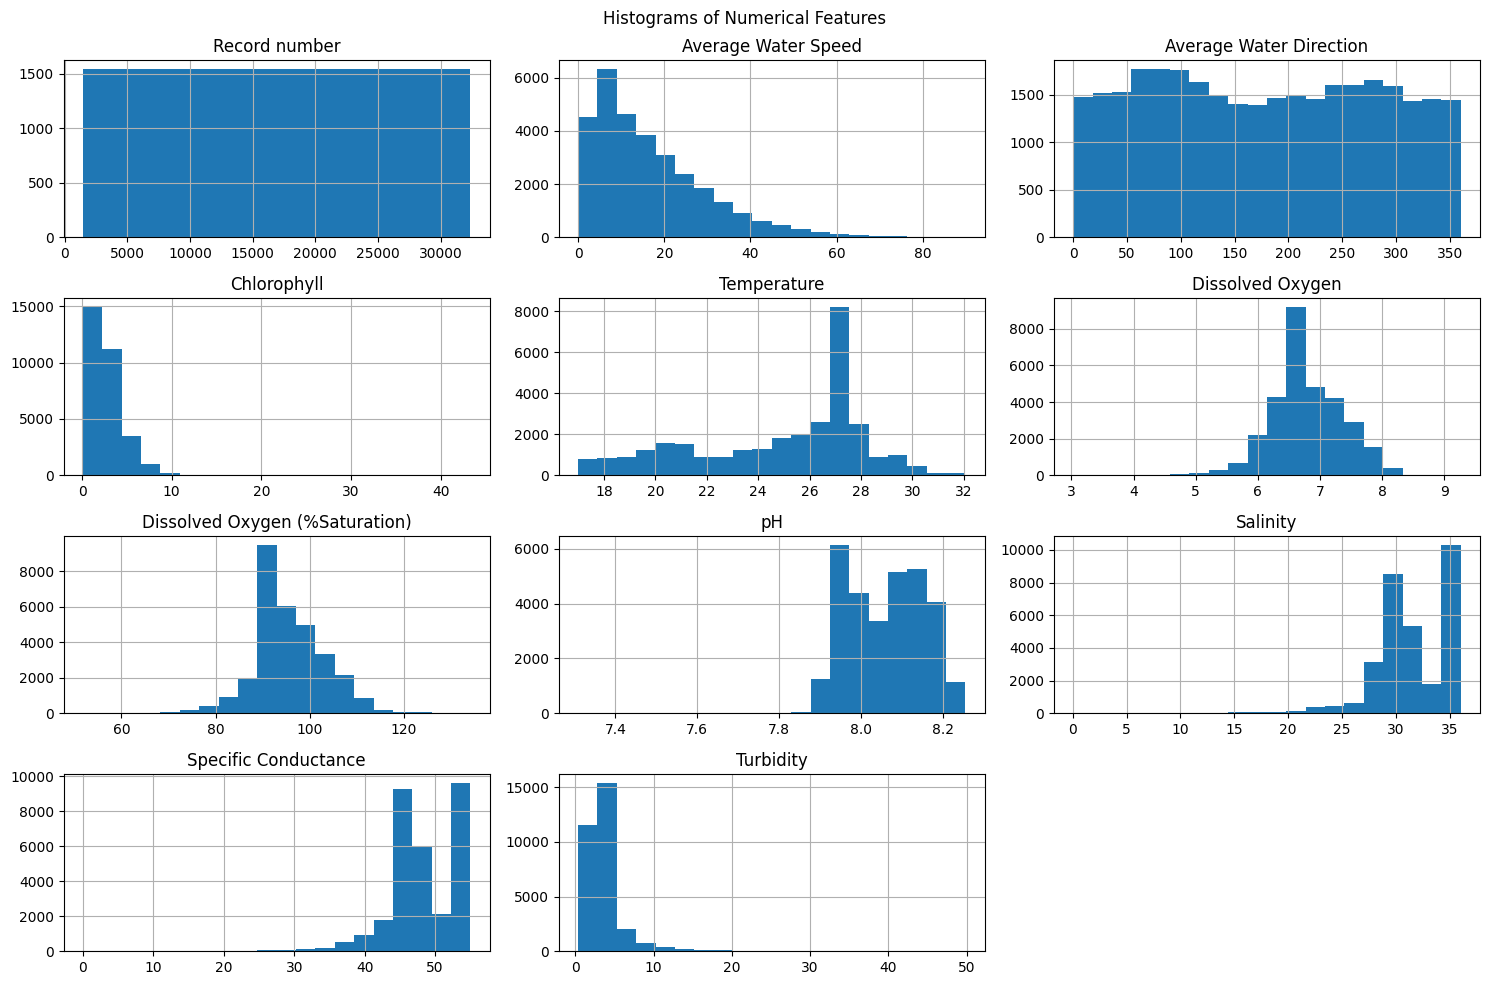

In [74]:
#histplot
# Histograms for numerical features
plt.figure(figsize=(20, 10))
df[numerical_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

In [141]:
# Calculate skewness and kurtosis
skewness = df[numerical_vars].skew()

print(skewness)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)

Record number                     0.000000
Average Water Speed               1.315217
Average Water Direction           0.037171
Chlorophyll                       2.292754
Temperature                      -0.685848
Dissolved Oxygen                 -0.013467
Dissolved Oxygen (%Saturation)    0.198240
pH                               -0.116080
Salinity                         -1.018777
Specific Conductance             -1.155896
Turbidity                         5.522606
dtype: float64
variable with positive skewness (skew > 1):
 Average Water Speed    1.315217
Chlorophyll            2.292754
Turbidity              5.522606
dtype: float64
variable with negative skewness (skew < -1):
 Salinity               -1.018777
Specific Conductance   -1.155896
dtype: float64


In [143]:
kurtosis = df[numerical_vars].kurt()
print(kurtosis)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions


platykurtic = kurtosis[kurtosis < 3]
leptokurtic = kurtosis[kurtosis > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic) 

Record number                     -1.200000
Average Water Speed                1.955591
Average Water Direction           -1.227794
Chlorophyll                       20.946822
Temperature                       -0.646691
Dissolved Oxygen                   0.871535
Dissolved Oxygen (%Saturation)     1.928750
pH                                -0.458317
Salinity                           3.214531
Specific Conductance               4.589095
Turbidity                         39.834007
dtype: float64
variables with platykurtic distribution (kurtosis < 3):
 Record number                    -1.200000
Average Water Speed               1.955591
Average Water Direction          -1.227794
Temperature                      -0.646691
Dissolved Oxygen                  0.871535
Dissolved Oxygen (%Saturation)    1.928750
pH                               -0.458317
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 Chlorophyll             20.946822
Salinity                 3.214531
Spe

In [144]:
# Apply log transformation to skewed data
for col in numerical_vars:
    if np.abs(df[col].skew()) > 0.5:
        df[col] = np.log1p(df[col])

In [145]:
# Verify skewness is addressed
print("\nSkewness after transformation:")
for col in numerical_vars:
    print(f"{col}: {df[col].skew()}")


Skewness after transformation:
Record number: 0.0
Average Water Speed: -0.30552508781399035
Average Water Direction: 0.037170572993428026
Chlorophyll: 0.1529950039207043
Temperature: -0.8678227531999879
Dissolved Oxygen: -0.013467157459853678
Dissolved Oxygen (%Saturation): 0.19824031670976577
pH: -0.11607997100875406
Salinity: -3.4488997298373314
Specific Conductance: -7.985668318880047
Turbidity: 1.347803651586131


**outlier detection and handling**

ValueError: num must be an integer with 1 <= num <= 8, not 9

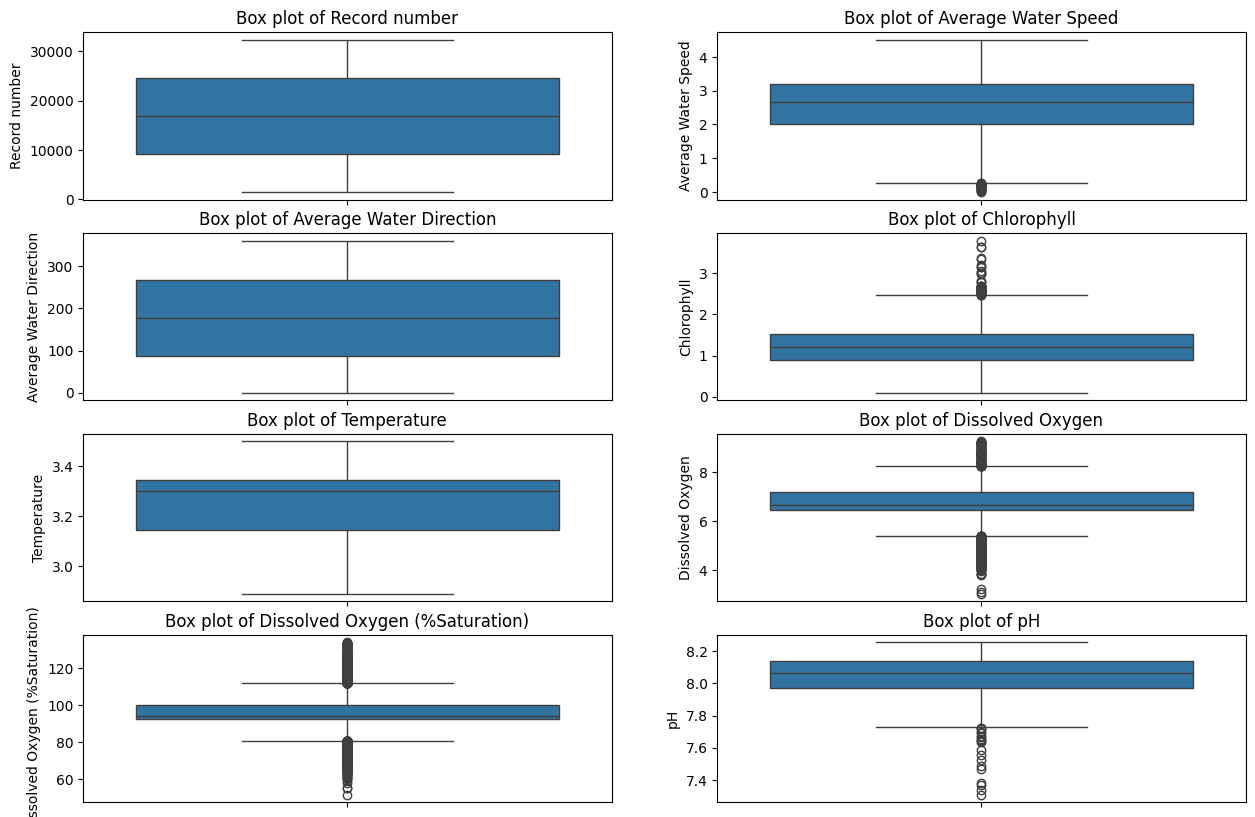

In [146]:
# Box plots for numerical features

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_vars):
    plt.subplot(4, 2, i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [147]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [148]:
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

ValueError: num must be an integer with 1 <= num <= 8, not 9

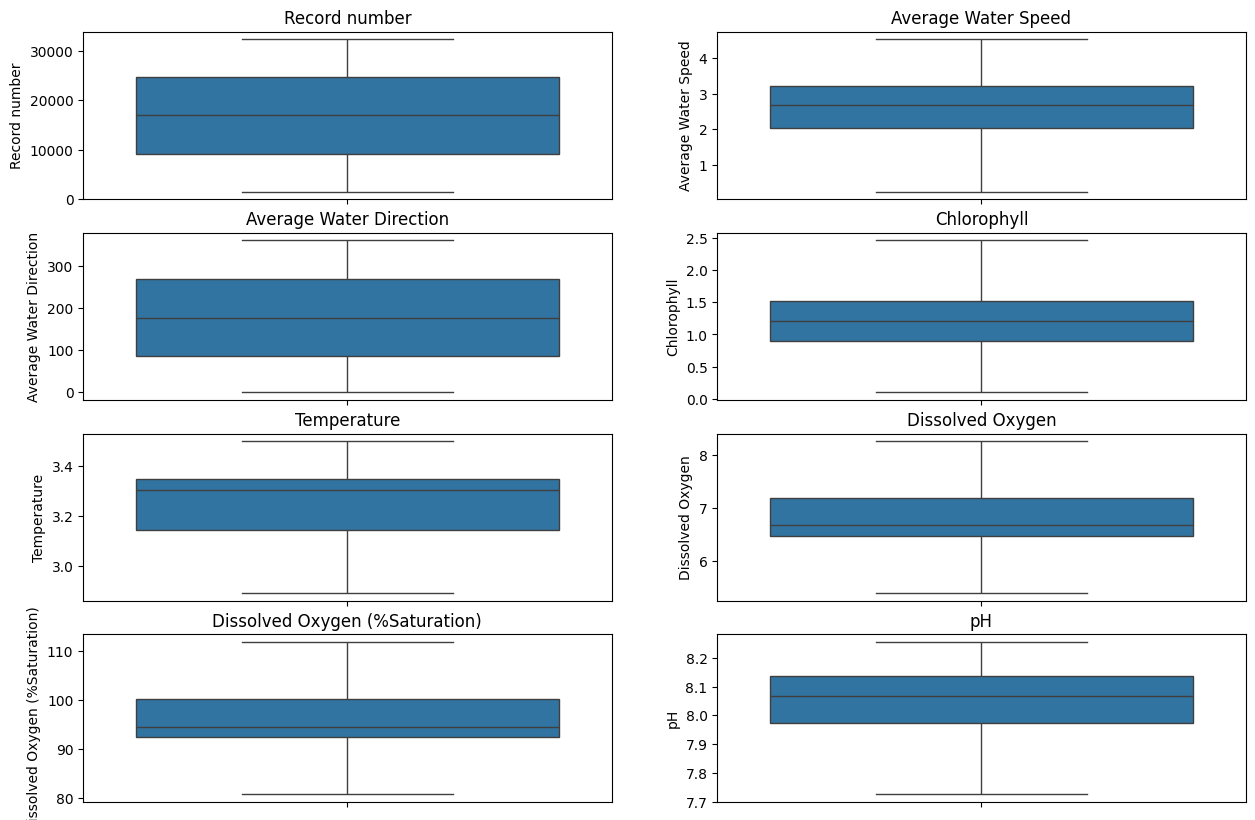

In [149]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [150]:
corr_matrix=df[numerical_vars].corr()

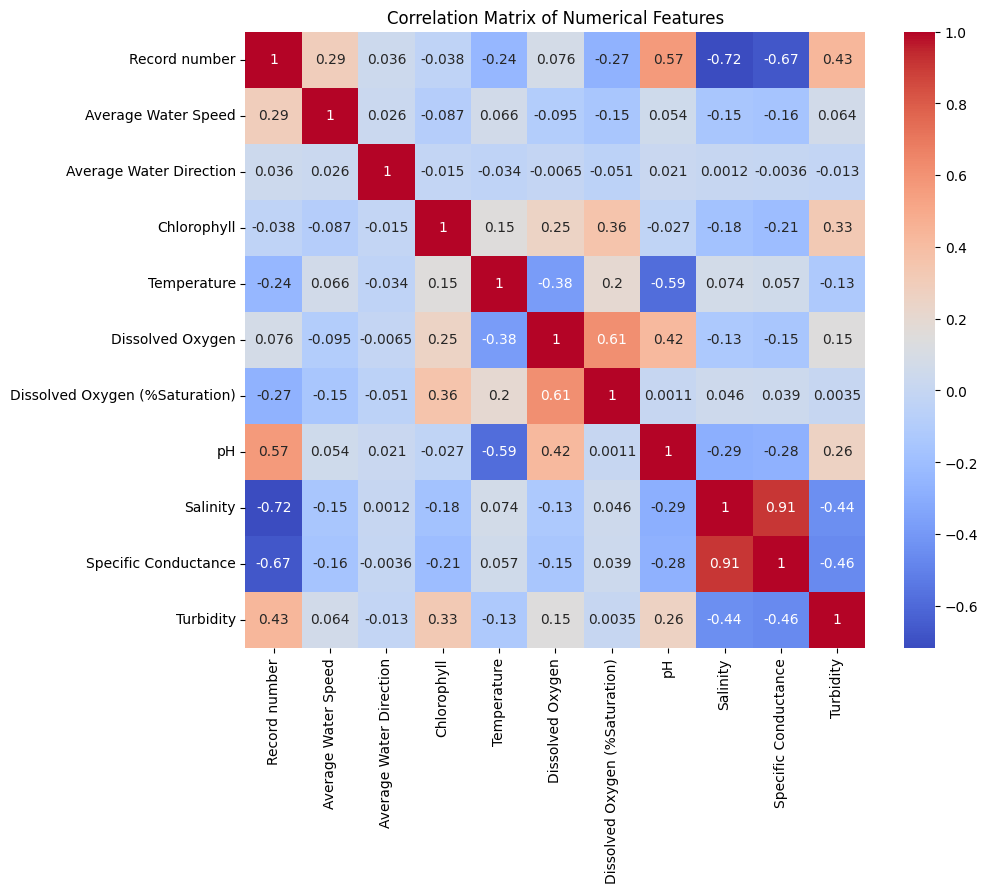

In [151]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

shows multicollinearity in the case of **salinity and specific conductance**

In [152]:
#remove salinity from further analysis
df=df.drop(columns=["Specific Conductance"])

In [153]:
df.shape

(30894, 11)

ValueError: Could not interpret value `Specific Conductance` for `x`. An entry with this name does not appear in `data`.

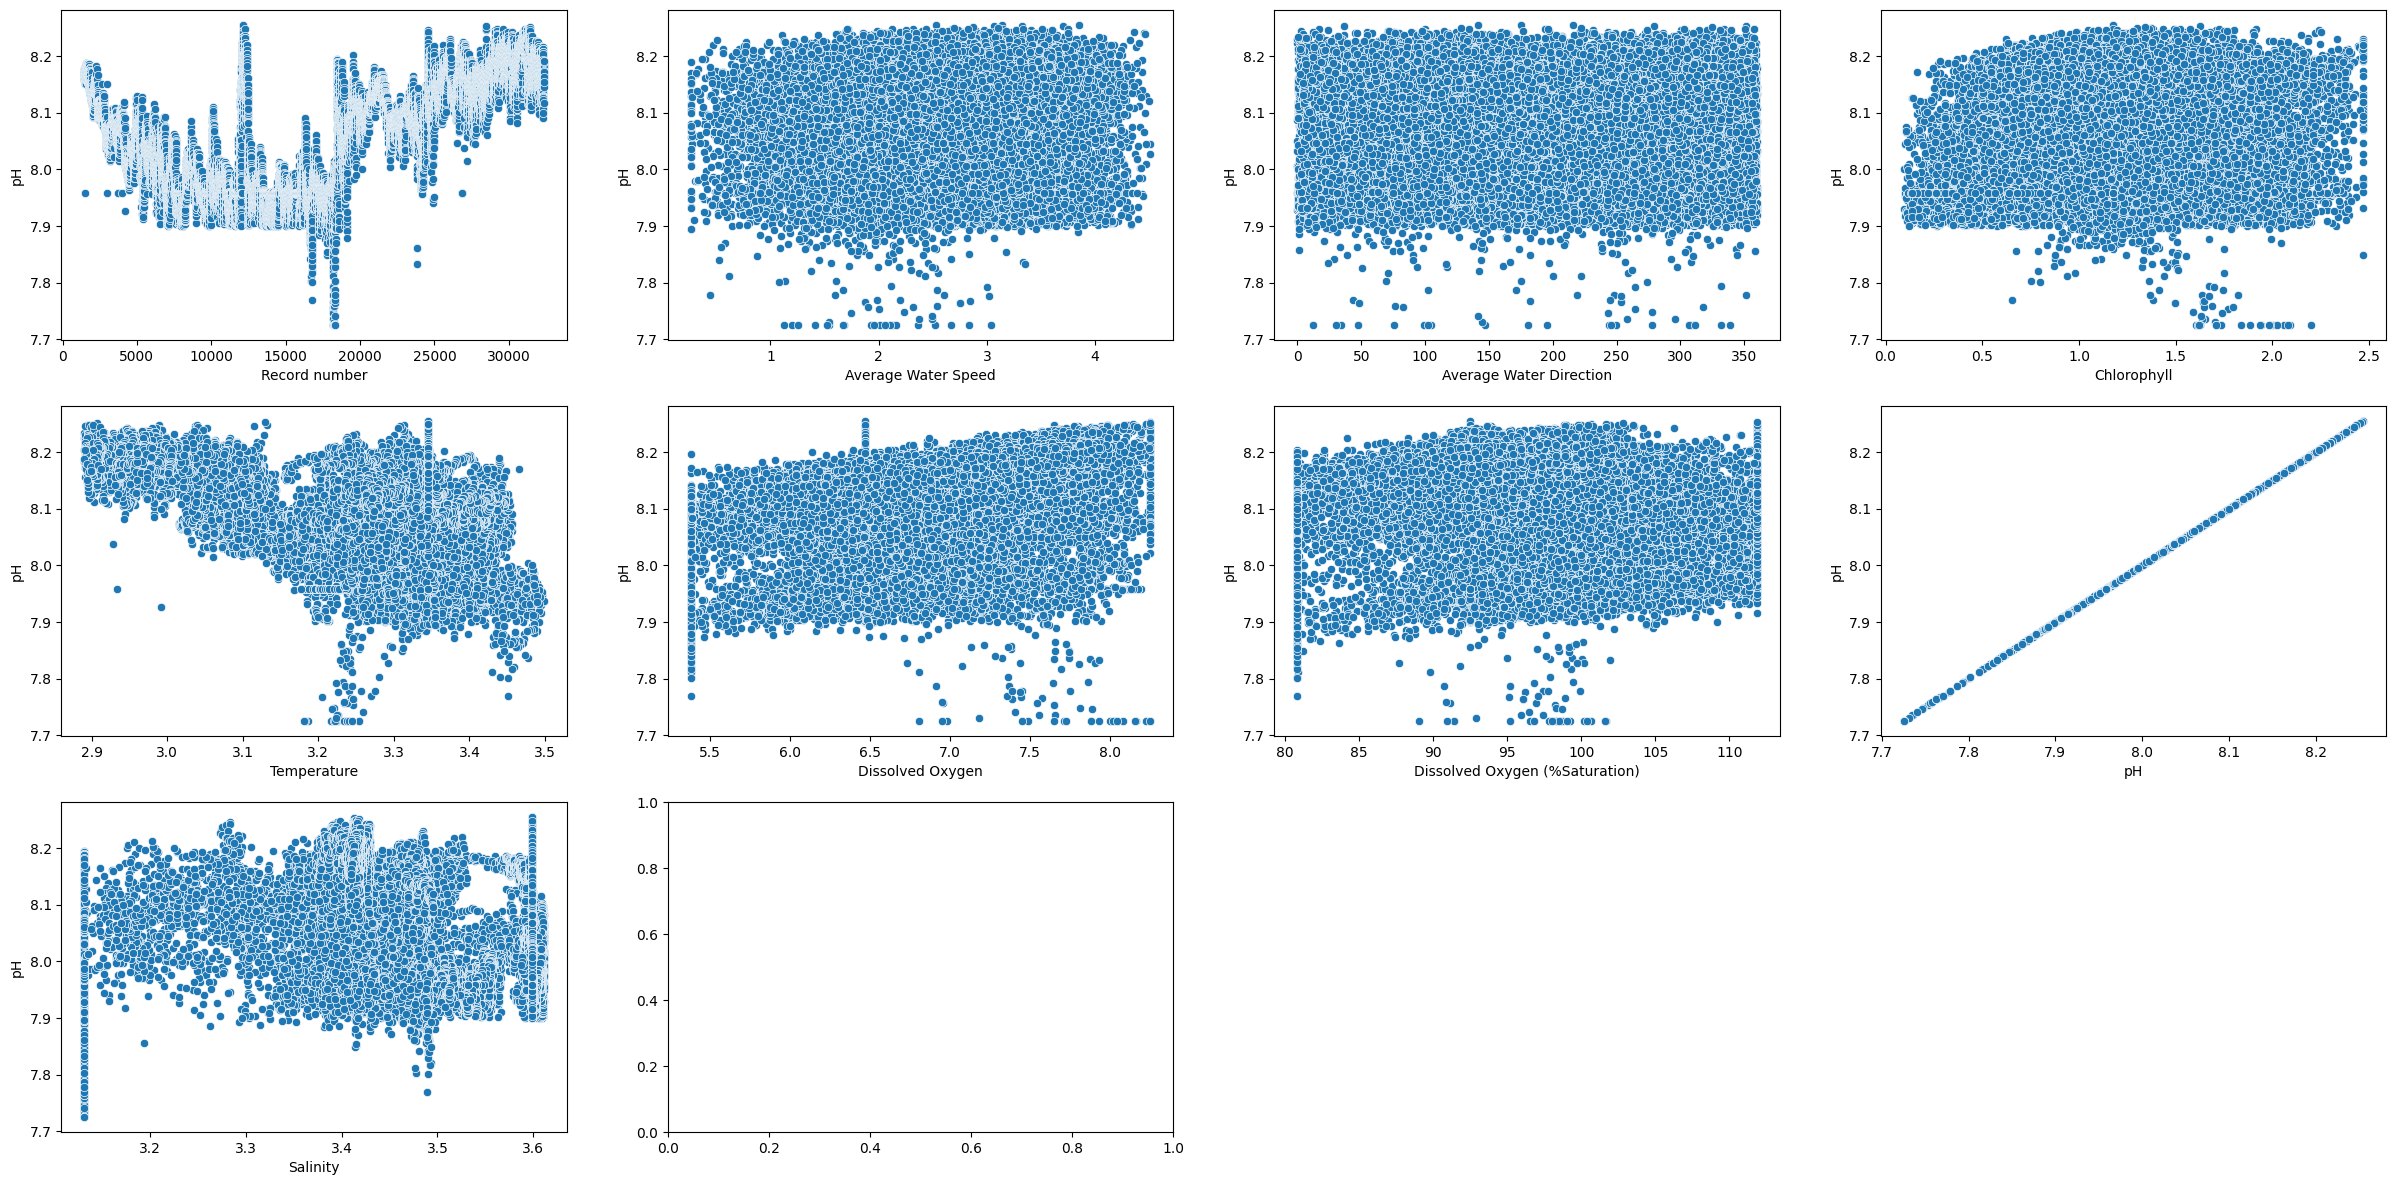

In [87]:
 #scatter plot to visualize relationship between target variable 
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_vars:
    fig.add_subplot(6,4,counter+1)
    sns.scatterplot(data=df,x=col,y='pH')
    plt.xlabel(col)
    counter = counter + 1

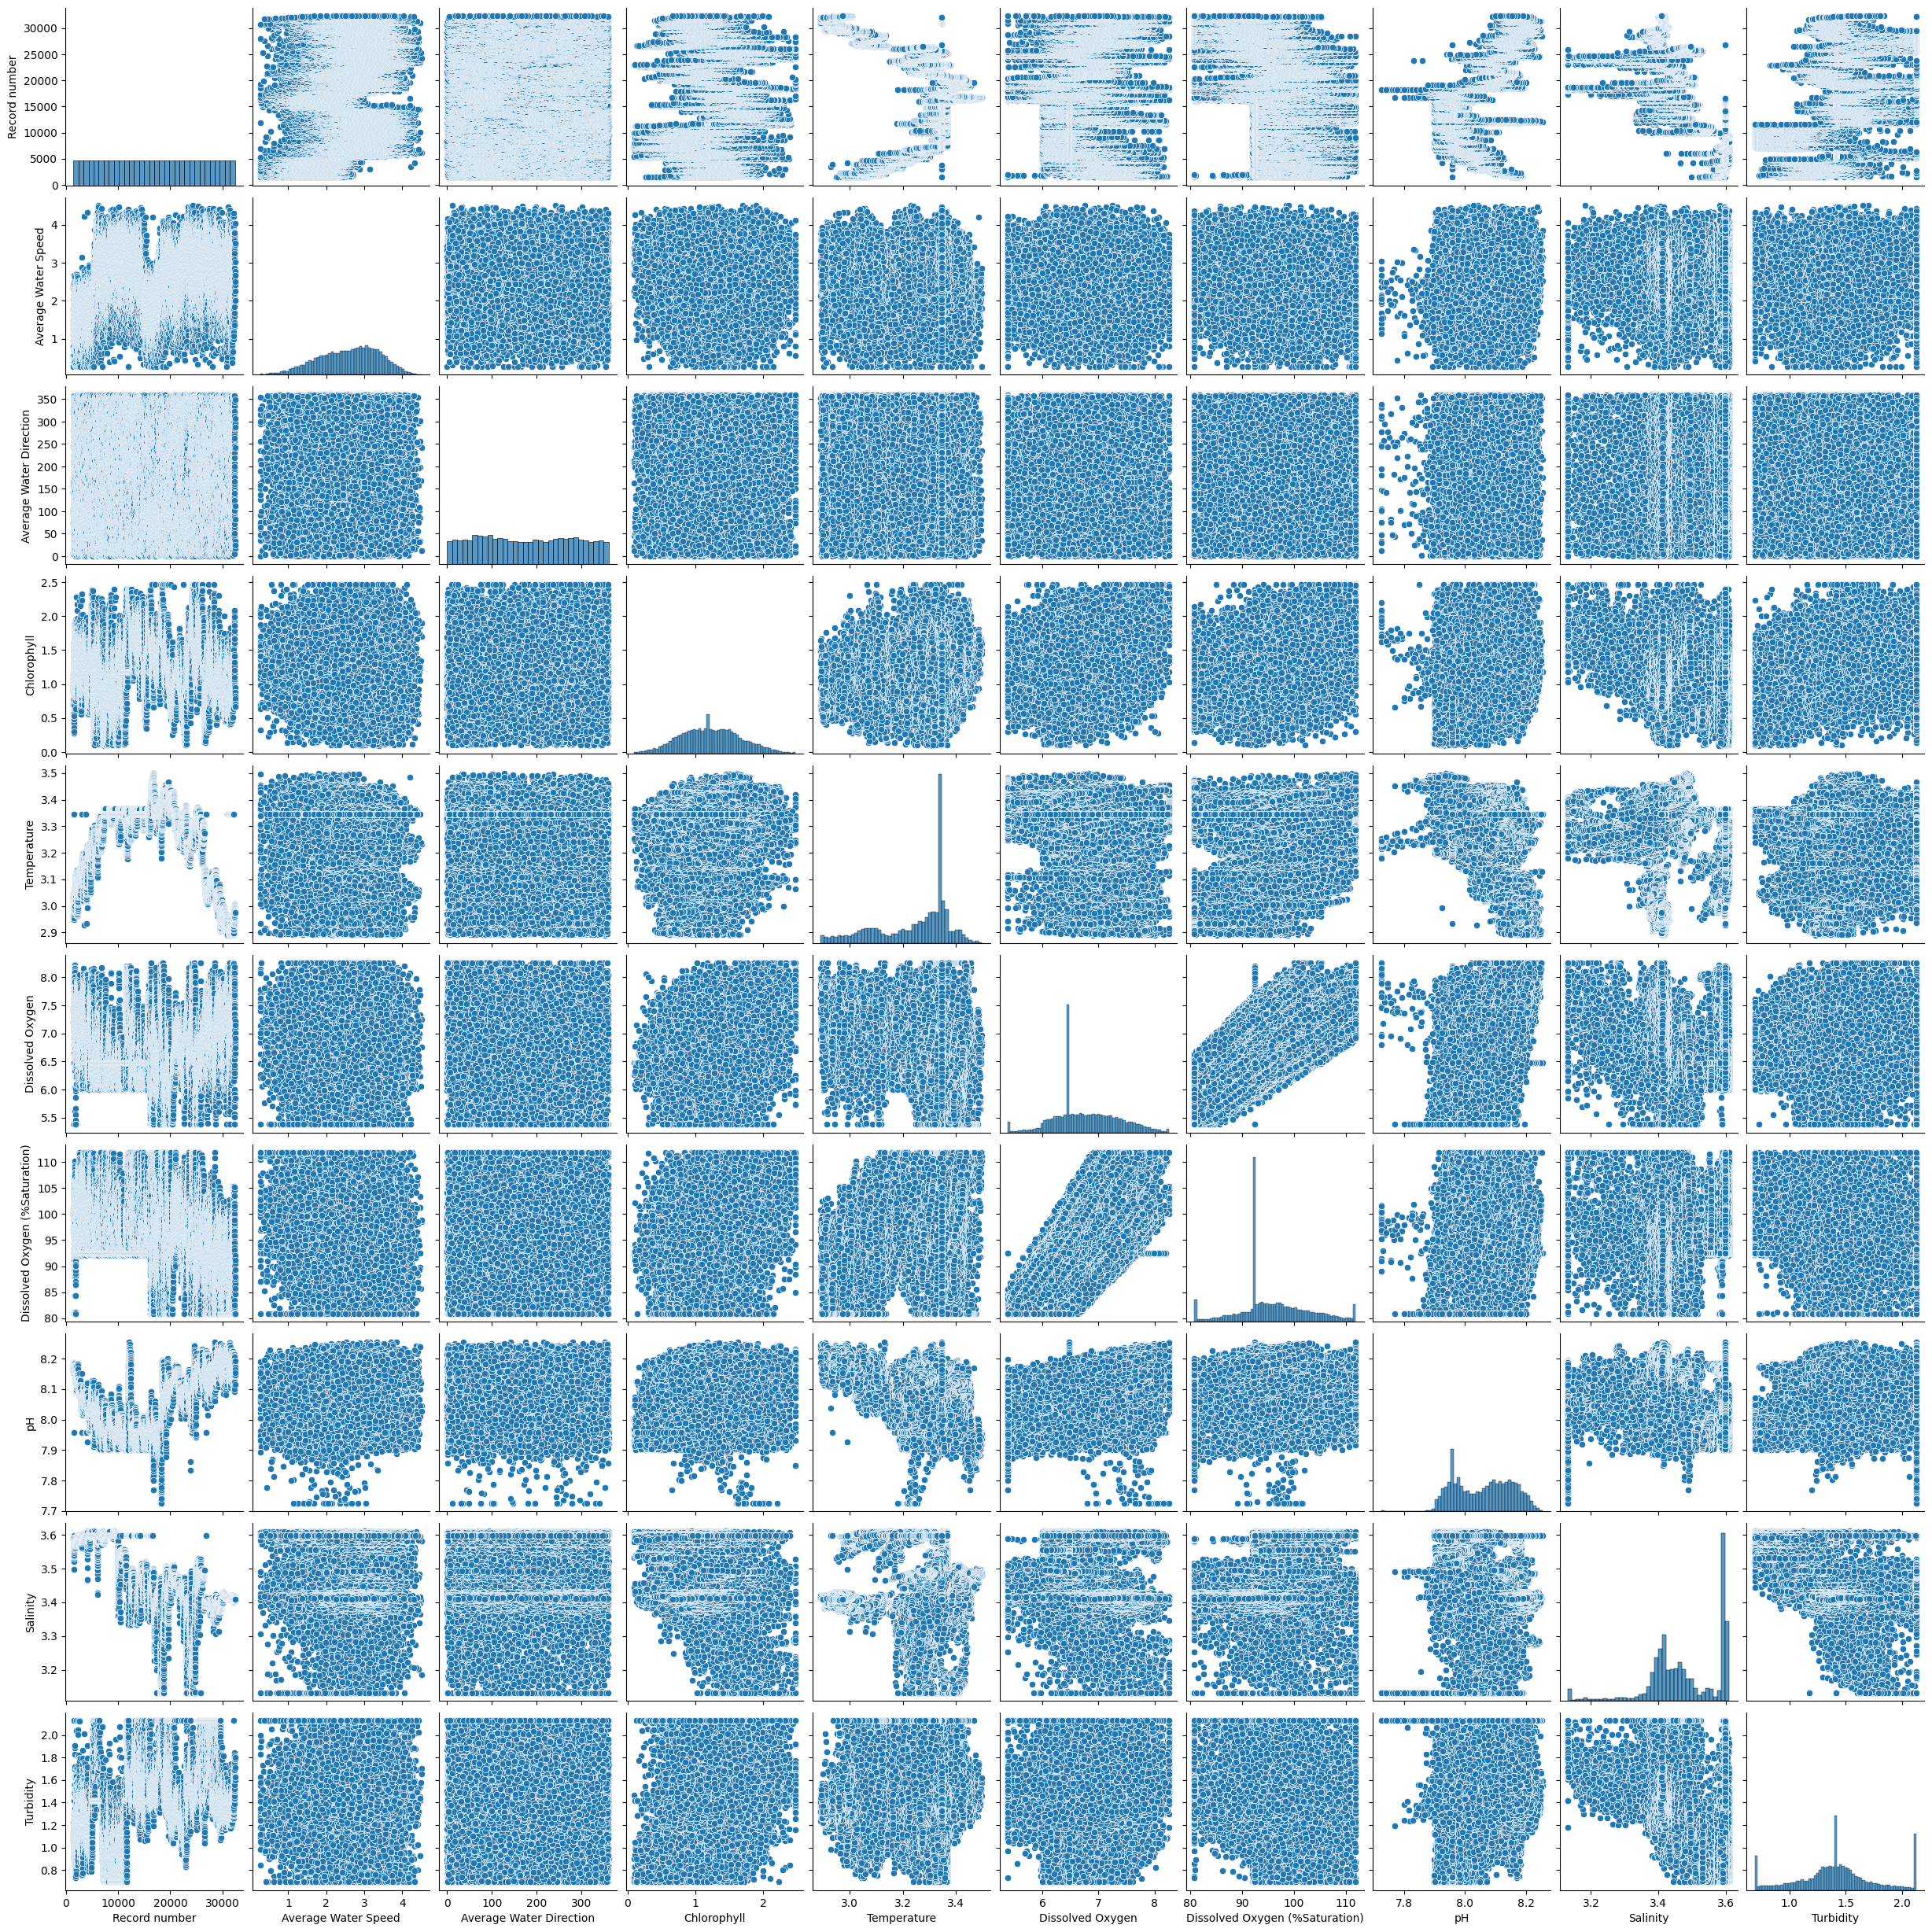

In [88]:
# Select only numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

# Plot pair plot
sns.pairplot(numerical_vars)
plt.show()

In [89]:
df['pH'].value_counts()

pH
7.958    1231
8.144     141
7.964     134
8.130     131
8.137     131
         ... 
7.736       1
7.792       1
7.748       1
7.746       1
8.251       1
Name: count, Length: 437, dtype: int64

In [90]:
# Save the cleaned dataset for further steps
df.to_csv('cleaned_dataset.csv', index=False)

In [91]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head()

Timestamp  Record number  Average Water Speed  \
0  2023-08-04 23:00:00         1468.0             1.763703   
1  2023-08-04 23:30:00         1469.0             1.265256   
2  2023-08-04 23:00:00         1470.0             0.815365   
3  2023-08-04 23:30:00         1471.0             0.565314   
4  2023-08-04 23:00:00         1472.0             1.480922   

   Average Water Direction  Chlorophyll  Temperature  Dissolved Oxygen  \
0                   73.484     0.963556     3.045379             7.472   
1                  106.424     1.084851     3.043856             7.455   
2                  156.755     0.963174     3.044570             7.430   
3                  281.754     1.015593     3.043713             7.419   
4                  244.637     0.968883     3.043856             7.429   

   Dissolved Oxygen (%Saturation)     pH  Salinity  Turbidity  
0                         101.175  8.176  3.589473   1.121026  
1                         100.884  8.175  3.589308   1.096610  
2                         100.571  8.171  3.589252   1.108563  
3                         100.398  8.171  3.589363   1.089572  
4                         100.538  8.171  3.589280   1.079769

In [92]:
#encoding
# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder


categorical_columns = df.select_dtypes(include='object').columns

# Encode categorical features # Load the cleaned dataset

for feature in categorical_vars:
    label_encoder  = LabelEncoder()
    df[feature] =label_encoder .fit_transform(df[feature])
df    

Timestamp  Record number  Average Water Speed  Average Water Direction  \
0              0         1468.0             1.763703                   73.484   
1              1         1469.0             1.265256                  106.424   
2              0         1470.0             0.815365                  156.755   
3              1         1471.0             0.565314                  281.754   
4              0         1472.0             1.480922                  244.637   
...          ...            ...                  ...                      ...   
30889      30609        32357.0             2.661238                   82.720   
30890      30610        32358.0             3.515032                   18.081   
30891      30611        32359.0             2.256751                  306.184   
30892      30612        32360.0             2.428424                   24.711   
30893      30613        32361.0             2.499220                  241.662   

       Chlorophyll  Temperature  Dissolved Oxygen  \
0         0.963556     3.045379             7.472   
1         1.084851     3.043856             7.455   
2         0.963174     3.044570             7.430   
3         1.015593     3.043713             7.419   
4         0.968883     3.043856             7.429   
...            ...          ...               ...   
30889     0.664748     2.975887             6.876   
30890     0.770571     2.973026             6.918   
30891     0.784814     2.973384             6.651   
30892     0.708528     2.972822             6.740   
30893     0.665776     2.973589             5.842   

       Dissolved Oxygen (%Saturation)     pH  Salinity  Turbidity  
0                          101.175000  8.176  3.589473   1.121026  
1                          100.884000  8.175  3.589308   1.096610  
2                          100.571000  8.171  3.589252   1.108563  
3                          100.398000  8.171  3.589363   1.089572  
4                          100.538000  8.171  3.589280   1.079769  
...                               ...    ...       ...        ...  
30889                       87.556000  8.151  3.410091   1.602010  
30890                       87.987000  8.163  3.409628   1.594933  
30891                       84.606000  8.145  3.409496   1.628652  
30892                       85.713000  8.154  3.409397   1.785406  
30893                       80.847875  8.116  3.409761   1.804676  

[30894 rows x 11 columns]

In [93]:
#data splitting

x = df.drop("pH",axis=1)
y = df["pH"]

In [94]:
x.shape

(30894, 10)

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
print("\ntrain set :\n",x_train.shape)
print("\ntest set :\n",x_test.shape)


train set :
 (21625, 10)

test set :
 (9269, 10)


In [97]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll', 'Temperature',
       'Dissolved Oxygen', 'Dissolved Oxygen (%Saturation)', 'pH', 'Salinity',
       'Turbidity'],
      dtype='object')>

In [99]:
#feature scaling


from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
columns=[ 'Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll','Temperature', 'Dissolved Oxygen','Dissolved Oxygen (%Saturation)','Salinity','Turbidity']
# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

df[columns] = scaled_df
df

Timestamp  Record number  Average Water Speed  Average Water Direction  \
0       0.000000       0.000000             0.352987                 0.204126   
1       0.000033       0.000032             0.235551                 0.295627   
2       0.000000       0.000065             0.129555                 0.435438   
3       0.000033       0.000097             0.070642                 0.782663   
4       0.000000       0.000129             0.286363                 0.679559   
...          ...            ...                  ...                      ...   
30889   0.999869       0.999871             0.564450                 0.229782   
30890   0.999902       0.999903             0.765607                 0.050226   
30891   0.999935       0.999935             0.469151                 0.850525   
30892   0.999967       0.999968             0.509598                 0.068643   
30893   1.000000       1.000000             0.526278                 0.671295   

       Chlorophyll  Temperature  Dissolved Oxygen  \
0         0.365563     0.254928          0.727716   
1         0.416633     0.252423          0.721797   
2         0.365403     0.253598          0.713092   
3         0.387473     0.252187          0.709262   
4         0.367806     0.252423          0.712744   
...            ...          ...               ...   
30889     0.239754     0.140640          0.520195   
30890     0.284310     0.135936          0.534819   
30891     0.290307     0.136524          0.441852   
30892     0.258187     0.135599          0.472841   
30893     0.240187     0.136861          0.160167   

       Dissolved Oxygen (%Saturation)     pH  Salinity  Turbidity  
0                            0.655481  8.176  0.955232   0.298480  
1                            0.646097  8.175  0.954886   0.281473  
2                            0.636004  8.171  0.954771   0.289799  
3                            0.630425  8.171  0.955001   0.276570  
4                            0.634940  8.171  0.954828   0.269743  
...                               ...    ...       ...        ...  
30889                        0.216314  8.151  0.580748   0.633508  
30890                        0.230213  8.163  0.579783   0.628578  
30891                        0.121187  8.145  0.579507   0.652065  
30892                        0.156884  8.154  0.579300   0.761251  
30893                        0.000000  8.116  0.580059   0.774673  

[30894 rows x 11 columns]

## linear regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)



LinearRegression()

In [103]:
y_pred1 = lr.predict(x_test)
y_pred1

array([8.01040456, 8.09125264, 8.12154397, ..., 8.04743627, 8.17583227,
       8.09051403])

In [104]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error



mae1 = mean_absolute_error(y_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae1}")
mse1 = mean_squared_error(y_test, y_pred1)
print(f"Mean Squared Error (MSE): {mse1}")

rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error (RMSE): {rmse1}")

r2 = r2_score(y_test,y_pred1)

print("r2_score :",r2)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred1):
    y_true, y_pred = np.array(y_true), np.array(y_pred1)
    return np.mean(np.abs((y_true - y_pred1) / y_true)) * 100

mape1 = mean_absolute_percentage_error(y_test, y_pred1)
print(f"Mean Absolute Percentage Error (MAPE): {mape1}")

Mean Absolute Error (MAE): 0.035337008723675595
Mean Squared Error (MSE): 0.002174421766993217
Root Mean Squared Error (RMSE): 0.04663069554481487
r2_score : 0.7397243999872813
Mean Absolute Percentage Error (MAPE): 0.43922424962873086


In [47]:
#Coefficients and Intercept
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [ 3.36398954e-03 -3.32908966e-03  1.03654120e-02  3.37739635e-06
 -2.37341961e-03  1.38777878e-17 -1.37090970e-02  8.67361738e-18
  1.79336445e-02  5.55111512e-17  2.17766800e-03  1.34517309e-29
  0.00000000e+00  2.19008054e-01  0.00000000e+00  0.00000000e+00
 -5.72898099e-03  0.00000000e+00]
Intercept: 11.91667055256789


## decision tree regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)



DecisionTreeRegressor()

In [110]:
y_pred2 = dt.predict(x_test)
y_pred2

array([7.972, 8.111, 8.099, ..., 7.984, 8.174, 8.139])

In [111]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error



mae2 = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae2}")
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error (MSE): {mse2}")

rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error (RMSE): {rmse2}")

r2 = r2_score(y_test,y_pred2)

print("r2_score :",r2)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred2):
    y_true, y_pred = np.array(y_true), np.array(y_pred2)
    return np.mean(np.abs((y_true - y_pred2) / y_true)) * 100

mape2 = mean_absolute_percentage_error(y_test, y_pred2)
print(f"Mean Absolute Percentage Error (MAPE): {mape2}")

Mean Absolute Error (MAE): 0.010698726939260004
Mean Squared Error (MSE): 0.00028569810659186606
Root Mean Squared Error (RMSE): 0.016902606502899667
r2_score : 0.9658022894893474
Mean Absolute Percentage Error (MAPE): 0.13300810553560752


## randomforest regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [115]:
y_pred3 = rf.predict(x_test)
y_pred3

array([7.96982, 8.08748, 8.09788, ..., 8.0079 , 8.17109, 8.13921])

In [116]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error



mae3 = mean_absolute_error(y_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae3}")
mse3 = mean_squared_error(y_test, y_pred3)
print(f"Mean Squared Error (MSE): {mse3}")

rmse3 = np.sqrt(mse3)
print(f"Root Mean Squared Error (RMSE): {rmse3}")

r2 = r2_score(y_test,y_pred3)

print("r2_score :",r2)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred3):
    y_true, y_pred = np.array(y_true), np.array(y_pred3)
    return np.mean(np.abs((y_true - y_pred3) / y_true)) * 100

mape3 = mean_absolute_percentage_error(y_test, y_pred3)
print(f"Mean Absolute Percentage Error (MAPE): {mape3}")

Mean Absolute Error (MAE): 0.007986857805588518
Mean Squared Error (MSE): 0.00015200741079134737
Root Mean Squared Error (RMSE): 0.01232912854955075
r2_score : 0.9818049006634042
Mean Absolute Percentage Error (MAPE): 0.09934651981172334


## GradientBoostingRegressor


In [117]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)


GradientBoostingRegressor()

In [118]:
y_pred4 = gb.predict(x_test)
y_pred4

array([7.94109777, 8.09135372, 8.10722402, ..., 8.00387801, 8.16979226,
       8.12590269])

In [119]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error



mae4 = mean_absolute_error(y_test, y_pred4)
print(f"Mean Absolute Error (MAE): {mae4}")
mse4 = mean_squared_error(y_test, y_pred4)
print(f"Mean Squared Error (MSE): {mse4}")

rmse4 = np.sqrt(mse4)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

r2 = r2_score(y_test,y_pred4)

print("r2_score :",r2)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred4):
    y_true, y_pred = np.array(y_true), np.array(y_pred4)
    return np.mean(np.abs((y_true - y_pred4) / y_true)) * 100

mape4 = mean_absolute_percentage_error(y_test, y_pred4)
print(f"Mean Absolute Percentage Error (MAPE): {mape4}")

Mean Absolute Error (MAE): 0.015753375258146903
Mean Squared Error (MSE): 0.00046771016098902325
Root Mean Squared Error (RMSE): 0.021626607708769844
r2_score : 0.9440156713700507
Mean Absolute Percentage Error (MAPE): 0.1958828903500283


## SVR

In [120]:
from sklearn.svm import SVR

# Support Vector Regression
svr = SVR()
svr.fit(x_train, y_train)




SVR()

In [121]:
y_pred5 = svr.predict(x_test)
y_pred5

array([8.02378023, 8.08890616, 8.06159083, ..., 8.010182  , 8.14823233,
       8.05235075])

In [122]:
mae5 = mean_absolute_error(y_test, y_pred5)
print(f"Mean Absolute Error (MAE): {mae5}")
mse5 = mean_squared_error(y_test, y_pred5)
print(f"Mean Squared Error (MSE): {mse4}")

rmse5 = np.sqrt(mse5)
print(f"Root Mean Squared Error (RMSE): {rmse5}")

r2 = r2_score(y_test,y_pred5)

print("r2_score :",r2)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred5):
    y_true, y_pred = np.array(y_true), np.array(y_pred5)
    return np.mean(np.abs((y_true - y_pred5) / y_true)) * 100

mape5 = mean_absolute_percentage_error(y_test, y_pred5)
print(f"Mean Absolute Percentage Error (MAPE): {mape5}")

Mean Absolute Error (MAE): 0.04581398720529305
Mean Squared Error (MSE): 0.00046771016098902325
Root Mean Squared Error (RMSE): 0.056391791046395176
r2_score : 0.6193538460059237
Mean Absolute Percentage Error (MAPE): 0.5694143778455794


In [123]:
# Extract feature importances
feature_importances = gb.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{x.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
Record number: 0.4720178067245386
Timestamp: 0.4063318131731932
Dissolved Oxygen: 0.06539951058976327
Temperature: 0.019315352512543224
Turbidity: 0.011266471533515496
Salinity: 0.009943151125479853
Dissolved Oxygen (%Saturation): 0.00948370889348594
Chlorophyll: 0.006200529200128771
Average Water Speed: 3.8257271507501326e-05
Average Water Direction: 3.398975844056924e-06


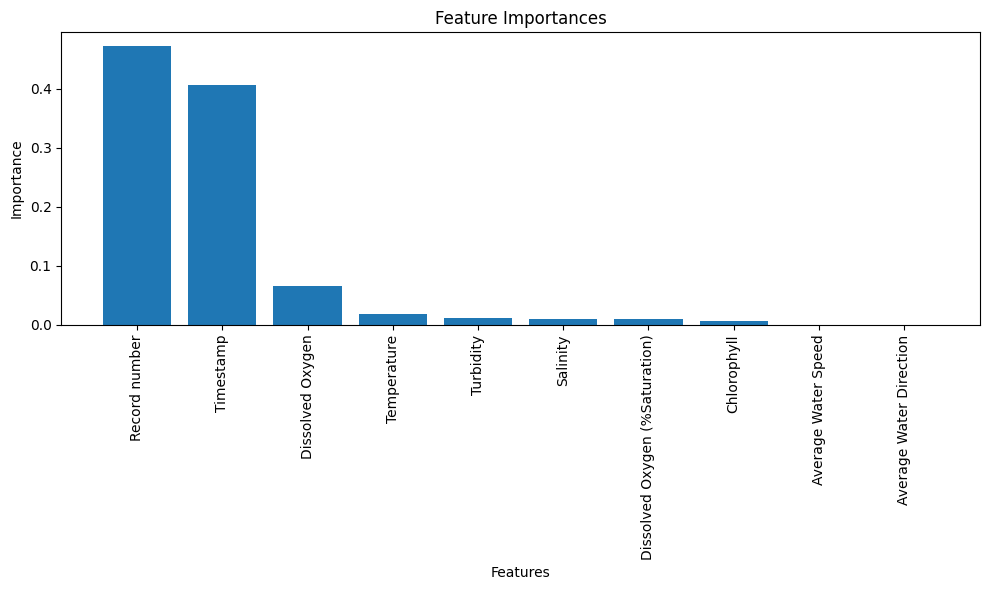

In [124]:
import matplotlib.pyplot as plt

# Assuming you have a trained Gradient Boosting model named GB_model
feature_importances = gb.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [x.columns[idx] for idx in sorted_indices]
sorted_importances = [feature_importances[idx] for idx in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [125]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Assume x_train and y_train are your training data
# x_train should be a pandas DataFrame containing your features
# y_train should be a pandas Series containing your target variable

# Initialize SelectKBest with f_classif scoring function and select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit selector to training data and transform X to select the top k features
x_selected = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original DataFrame
selected_features = np.array(x.columns)[selected_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Timestamp' 'Record number' 'Average Water Speed'
 'Average Water Direction' 'Chlorophyll' 'Temperature' 'Dissolved Oxygen'
 'Dissolved Oxygen (%Saturation)' 'Salinity' 'Turbidity']


In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes isn't typically used for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

# Corrected code with commas separating the column names
x1 = df[['Timestamp' ,'Record number', 'Average Water Speed',
 'Average Water Direction', 'Chlorophyll' ,'Temperature', 'Dissolved Oxygen',
 'Dissolved Oxygen (%Saturation)' ,'Salinity' ,'Turbidity']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the regressors
regressors = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    MLPRegressor(max_iter=1000),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

# Lists to store evaluation metrics
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Train and evaluate each model
for model in regressors:
    model.fit(x1_train, y1_train)
    y_pred = model.predict(x1_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y1_test, y_pred, squared=False))
    MSE.append(mean_squared_error(y1_test, y_pred))
    MAE.append(mean_absolute_error(y1_test, y_pred))
    R2_score.append(r2_score(y1_test, y_pred) * 100)

# Create DataFrame to display the metrics
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

# Set the index to 'Model-Name' and sort by 'R2_Score'
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df


RMSE       MSE       MAE   R2_Score
Model-Name                                                        
RandomForestRegressor      0.012272  0.000151  0.007978  98.197177
DecisionTreeRegressor      0.016983  0.000288  0.010742  96.547669
GradientBoostingRegressor  0.021616  0.000467  0.015746  94.406986
KNeighborsRegressor        0.027692  0.000767  0.018593  90.821100
AdaBoostRegressor          0.043359  0.001880  0.035645  77.496250
MLPRegressor               0.045899  0.002107  0.034572  74.782781
LinearRegression           0.046631  0.002174  0.035337  73.972440
SVR                        0.046961  0.002205  0.038661  73.602926

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Optimized parameters for grid search
param_grid_gbr = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Gradient Boosting Regressor model
gb = GradientBoostingRegressor()

# Grid search object
Grid_gbr = GridSearchCV(estimator=gb, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gbr.fit(x_train, y_train)

# Best parameters
GBR_best_params = Grid_gbr.best_params_
print("Best parameters for Gradient Boosting Regressor: ", GBR_best_params)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting Regressor:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [129]:
# Predicting the test set results
y_pred_gbr = Grid_gbr.predict(x_test)

# Evaluating the performance
mse_gbr = mean_squared_error(y1_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y1_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y1_test, y_pred_gbr)
r2_gbr = r2_score(y1_test, y_pred_gbr) * 100

# Printing the evaluation metrics
print(f"Mean Squared Error: {mse_gbr}")
print(f"Root Mean Squared Error: {rmse_gbr}")
print(f"Mean Absolute Error: {mae_gbr}")
print(f"R² Score: {r2_gbr}")

Mean Squared Error: 0.00016220104441276177
Root Mean Squared Error: 0.01273581738298574
Mean Absolute Error: 0.008554567808532776
R² Score: 98.05847353084592


**conclusion**

The Randomforest regressor exhibits exceptional performance with a Mean Squared Error of 0.000151, a Root Mean Squared Error of 0.0122, and a Mean Absolute Error of 0.007 . The model achieves an impressive R² score of 98.19%, highlighting its strong predictive accuracy and effectiveness in capturing the underlying patterns in the data

**model deployment**

In [73]:
import joblib

# Define the filename to save the model
filename = 'Grid_gbr.joblib'

# Save the model using joblib
joblib.dump(Grid_gbr , filename)

print("Model saved successfully.")


import os

# Check if the model file exists
if os.path.isfile('Grid_gbr.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")


Model saved successfully.
Model file exists.


In [ ]:
import joblib

# Define the filename to load the model from
filename = 'Grid_gbr.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")